In [1]:
!pip install yfinance


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
     - -------------------------------------- 0.1/3.0 MB 1.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.5 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 1.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 1.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 1.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.0 MB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 1.2 MB/s eta 0:00:03
     ------ --------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     ------- -------------------------------- 0.5/3.0 MB 1.2 MB/s eta 0:00:03
     --------- ------------------------------ 0.7/3.0 MB 1.4 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.5 MB/s eta 

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Download stock data
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Only keep the 'Close' column
data = stock_data[['Close']]
data


[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2022-12-23,131.860001
2022-12-27,130.029999
2022-12-28,126.040001


In [6]:
# Create a new column for the target variable (1 if the price went up, 0 if it went down)
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data = data.dropna()

# Create feature set (X) and labels (y)
X = data[['Close']]
y = data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.5251908396946565
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.05      0.09       316
           1       0.52      0.97      0.68       339

    accuracy                           0.53       655
   macro avg       0.56      0.51      0.38       655
weighted avg       0.56      0.53      0.39       655



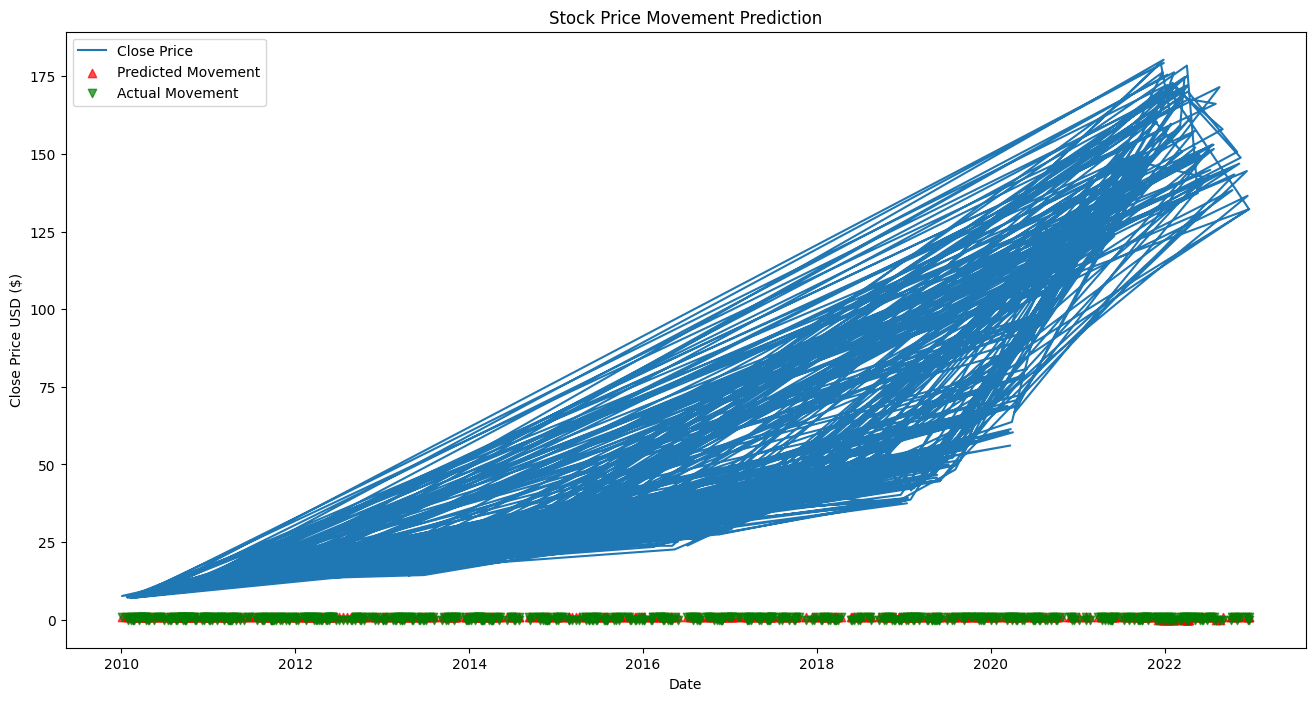

In [9]:
# Add the predictions to the test data
X_test['Predictions'] = y_pred
X_test['Actual'] = y_test.values

# Plot the data
plt.figure(figsize=(16,8))
plt.plot(X_test.index, X_test['Close'], label='Close Price')
plt.scatter(X_test.index, X_test['Predictions'], color='red', label='Predicted Movement', marker='^', alpha=0.7)
plt.scatter(X_test.index, X_test['Actual'], color='green', label='Actual Movement', marker='v', alpha=0.7)
plt.title('Stock Price Movement Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()
